In [1]:
import scanpy as sc
import pandas as pd
import loompy 
import numpy as np 
import scvelo as scv
import cellrank as cr
import matplotlib.pyplot as plt
import matplotlib as mpl
from anndata import AnnData
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
scv.set_figure_params(dpi=120, figsize=(8, 8), facecolor='white')
sc.settings.set_figure_params(dpi=120)
sc.settings.set_figure_params(dpi=150, facecolor='white')

scanpy==1.9.1 anndata==0.8.0 umap==0.5.3 numpy==1.22.4 scipy==1.9.1 pandas==1.4.2 scikit-learn==1.1.2 statsmodels==0.13.2 python-igraph==0.9.9 louvain==0.7.1 pynndescent==0.5.7


In [27]:
adata = sc.read_h5ad('/proj/snic2020-16-146/10xgams/seurat_analysis/results/single_cell/integrated_dataset_SS2_10X_velo.h5ad')
adata

AnnData object with n_obs × n_vars = 4991 × 4912
    obs: 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'pct_counts_hb', 'n_counts', 'S_score', 'G2M_score', 'phase', 'louvain_0.4', 'leiden_0.4', 'louvain_0.6', 'leiden_0.6', 'louvain_0.8', 'leiden_0.8', 'louvain_0.9', 'leiden_0.9', 'louvain_1.0', 'leiden_1.0', 'louvain_1.1', 'leiden_1.1', 'louvain_1.2', 'leiden_1.2', 'louvain_1.4', 'leiden_1.4', 'louvain_1.6', 'leiden_1.6', 'day', 'batch', 'sample', 'clusters'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: 'batch_colors', 'clusters_colors', 'day_colors', 'dendrogram_clusters', 'hvg', 'leiden', 'leiden_0.4_colors', 'leiden_0.6_colors', 'leiden_0.8_colors', 'leiden_0.9_colors', 'leiden

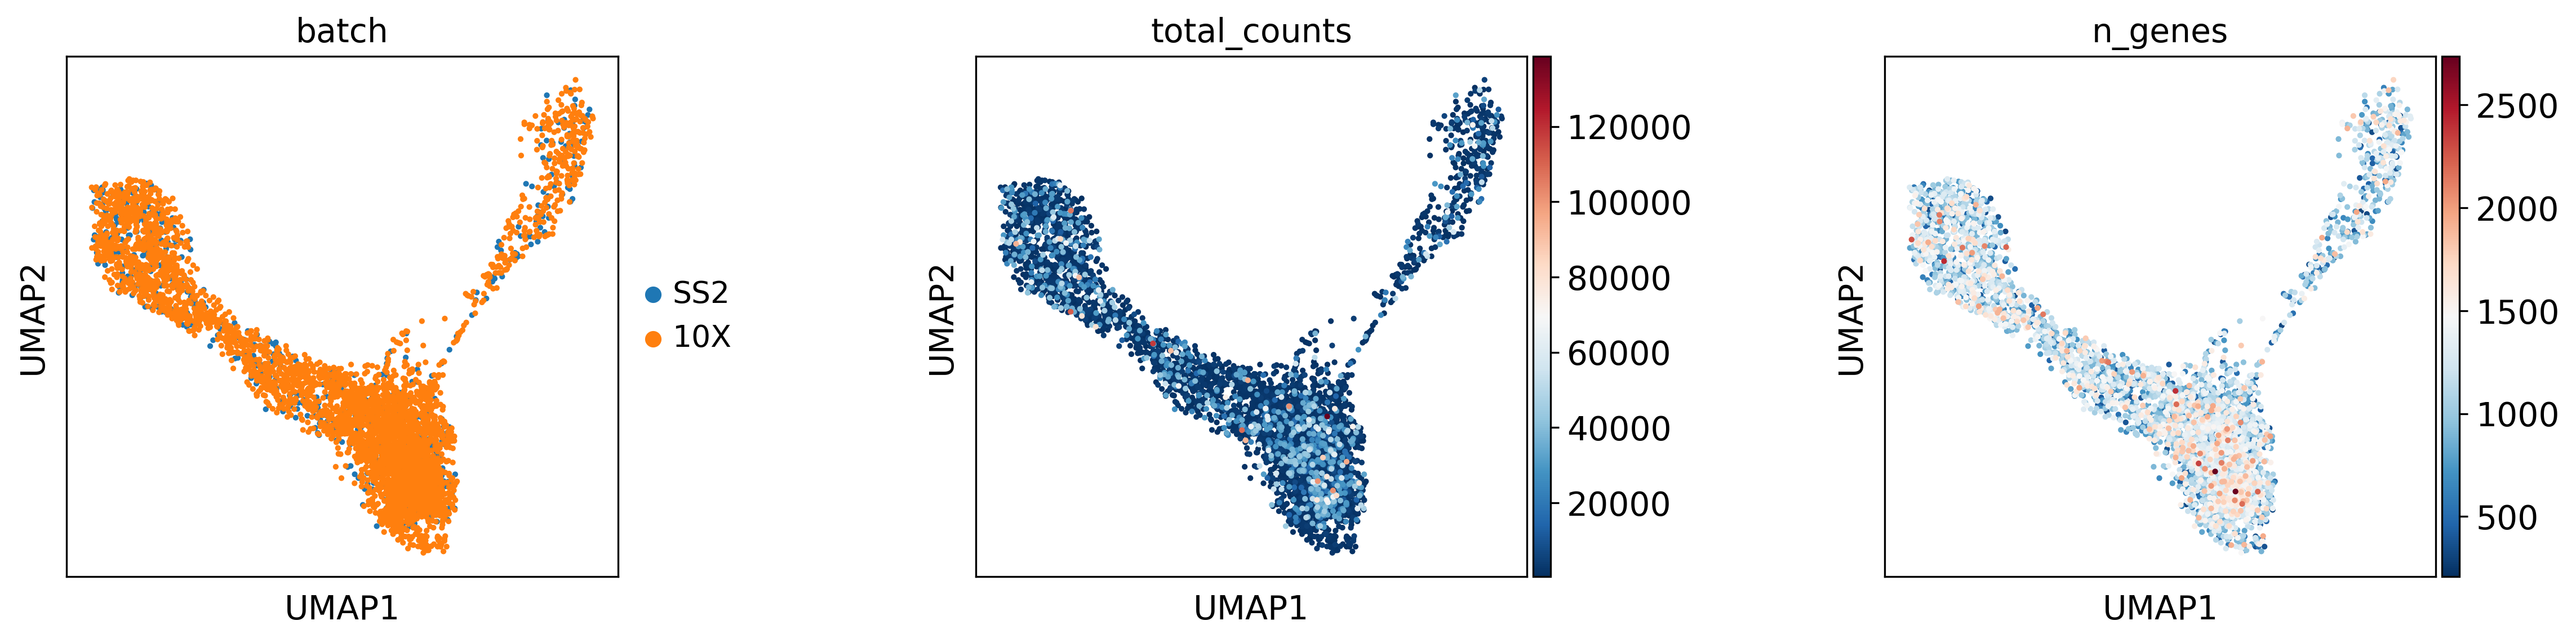

In [28]:
sc.pl.umap(adata, color= ['batch', 'total_counts', 'n_genes'] , wspace=0.5)

In [29]:
#scv.pp.filter_and_normalize(adata, enforce=True)
scv.pp.moments(adata)

Normalized count data: X, spliced, unspliced.
computing neighbors
    finished (0:00:01) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:01) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


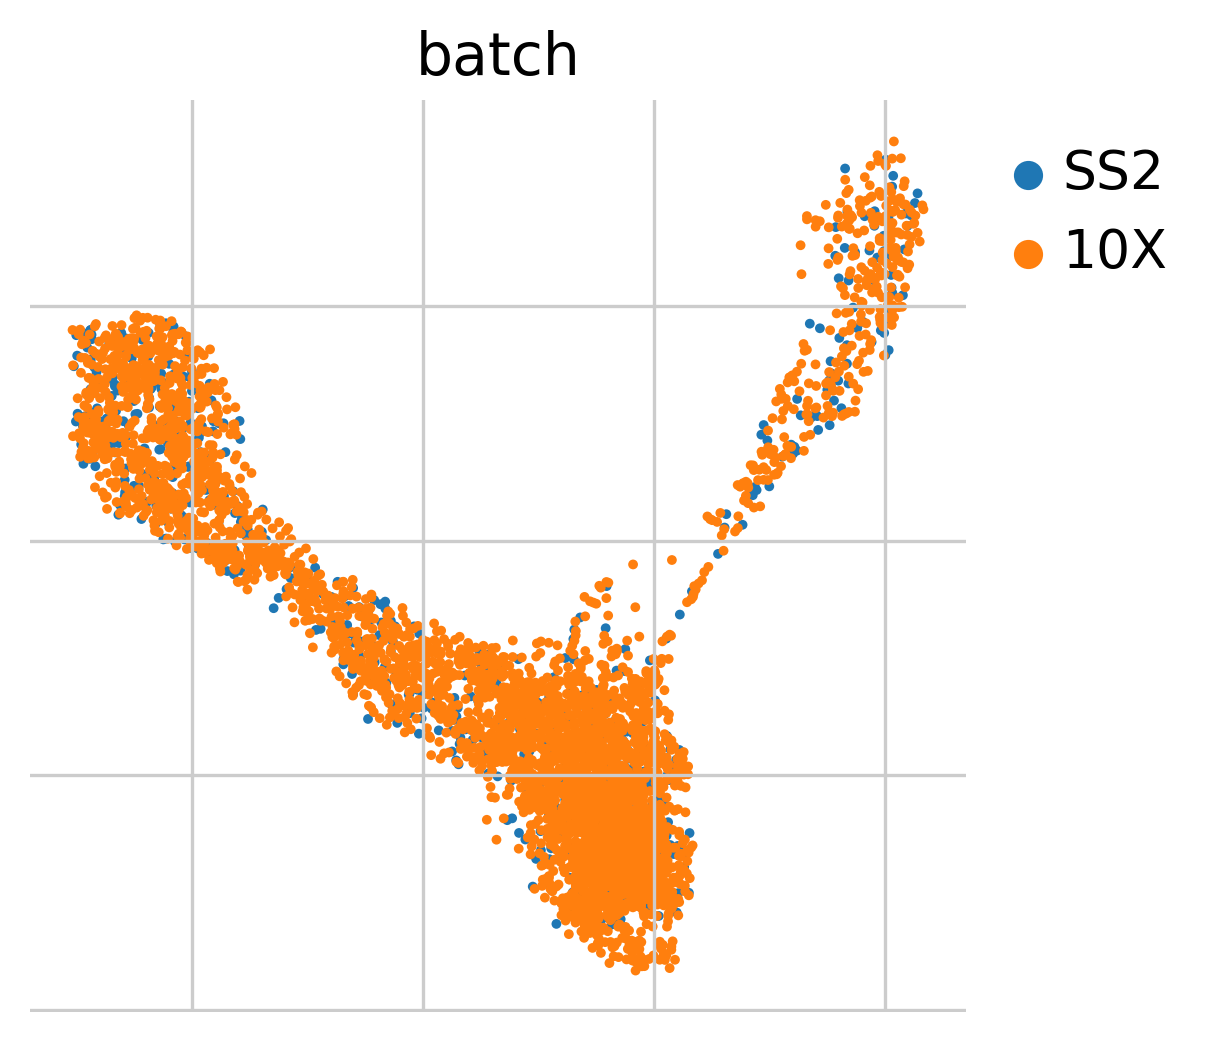

In [30]:
scv.pl.umap(adata, color = 'batch')

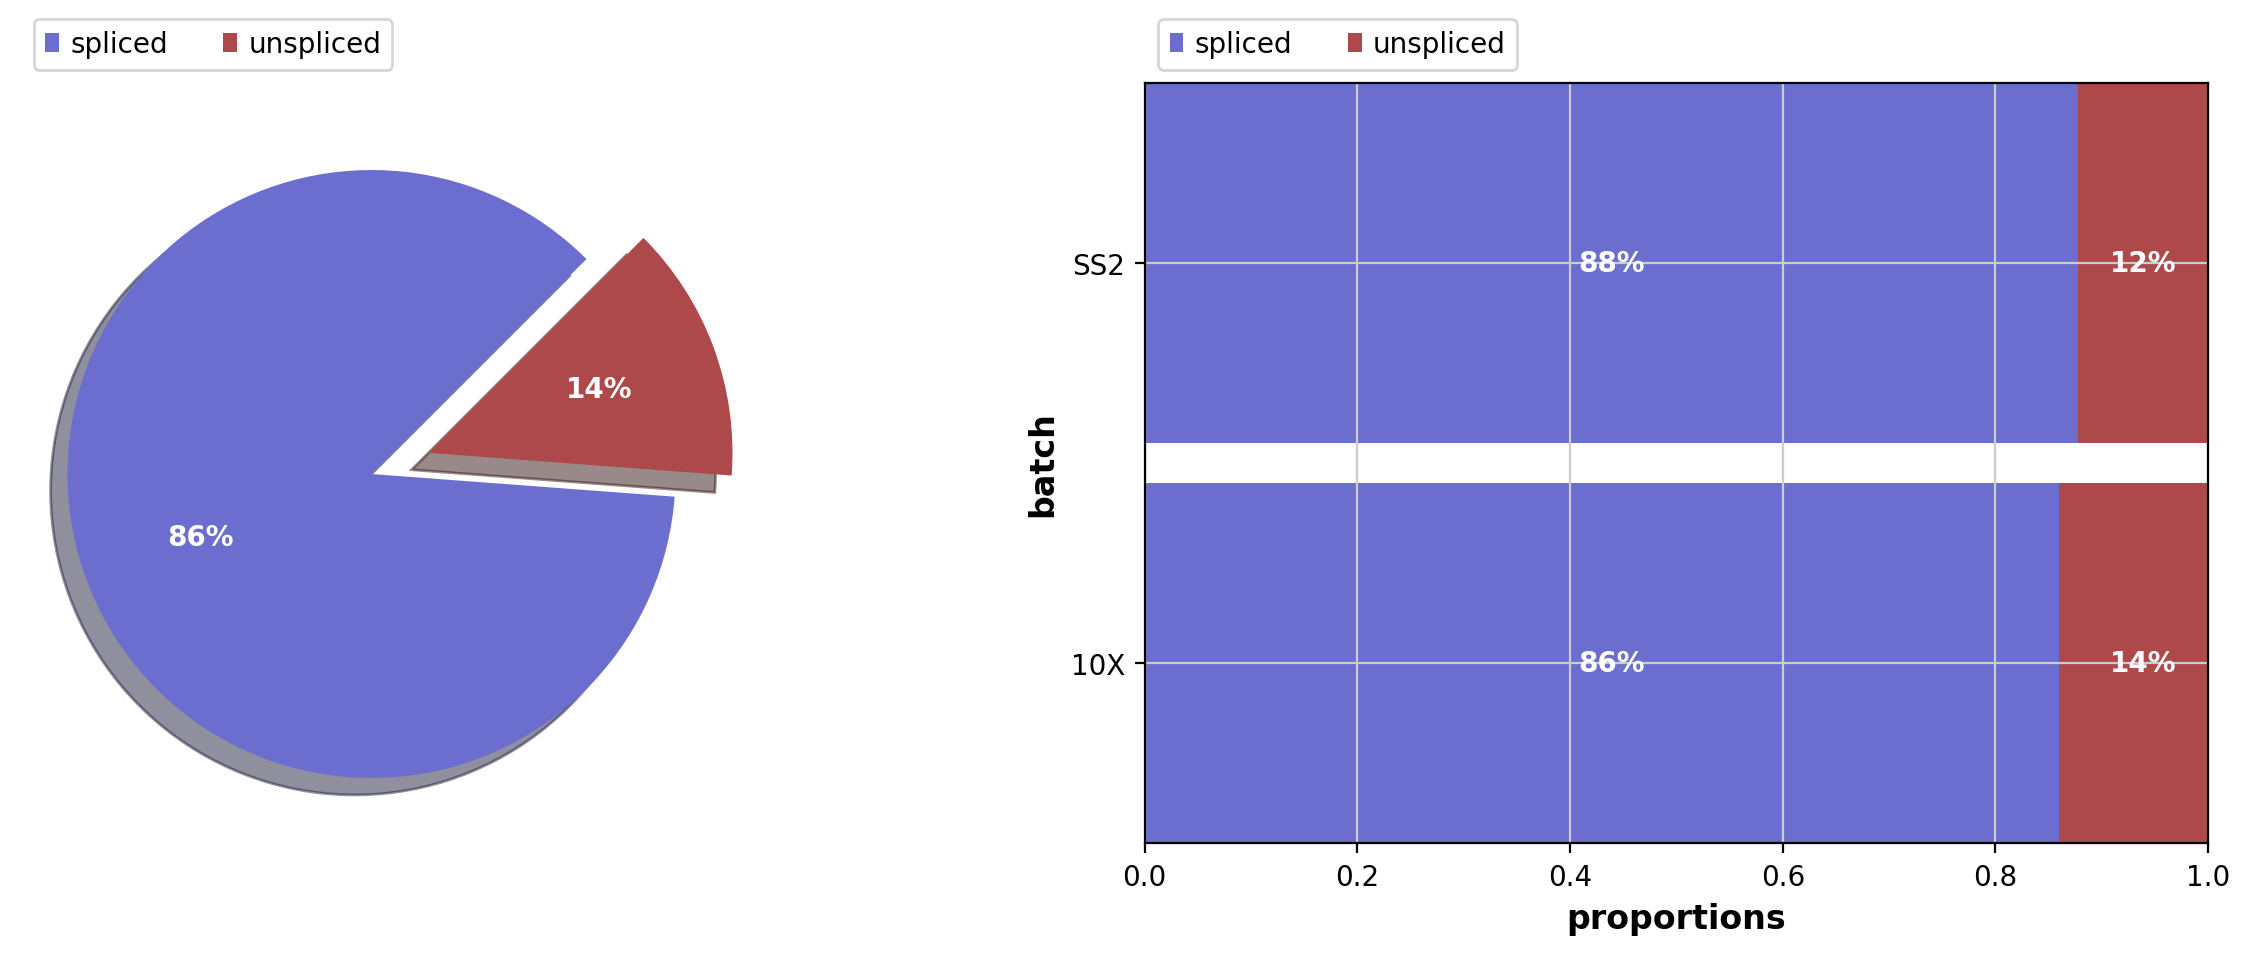

In [31]:
#scv.pl.proportions(adata,  groupby='batch')
scv.pl.proportions(adata, groupby='batch',layers=None, highlight='unspliced', add_labels_pie=True, 
    add_labels_bar=True, fontsize=10, figsize=(15, 5), dpi=100, use_raw=True, show=True)



In [32]:
#scv.pp.filter_and_normalize(adata, min_shared_counts=20, n_top_genes=4000)
scv.pp.moments(adata, n_pcs=30, n_neighbors=10)

computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


In [33]:
scv.tl.velocity(adata)
scv.tl.velocity_graph(adata)


computing velocities
    finished (0:00:02) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph (using 1/20 cores)


  0%|          | 0/4991 [00:00<?, ?cells/s]

/home/mubasher/.conda/envs/spatial/lib/python3.9/site-packages/scvelo/core/_parallelize.py:138: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  res = np.array(res) if as_array else res


    finished (0:00:04) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


computing velocity embedding
    finished (0:00:01) --> added
    'velocity_pca', embedded velocity vectors (adata.obsm)


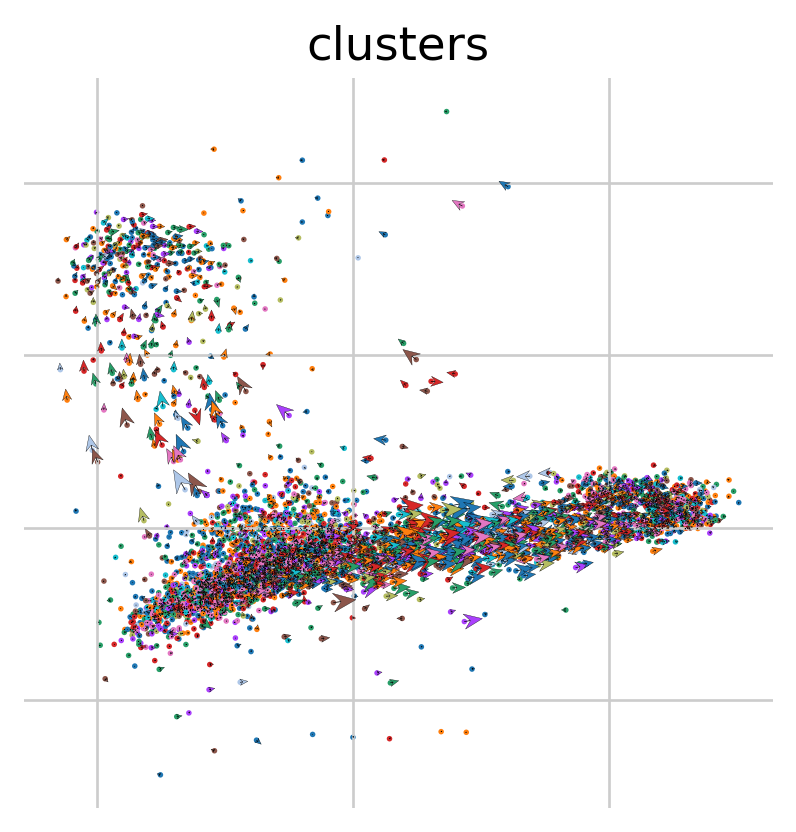

computing velocity embedding
    finished (0:00:01) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


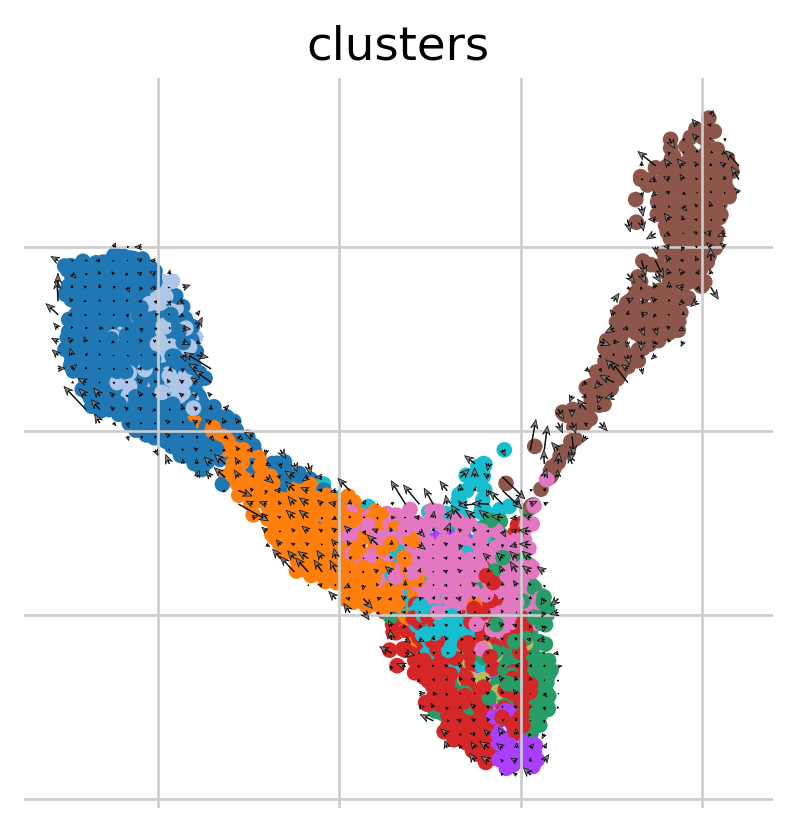

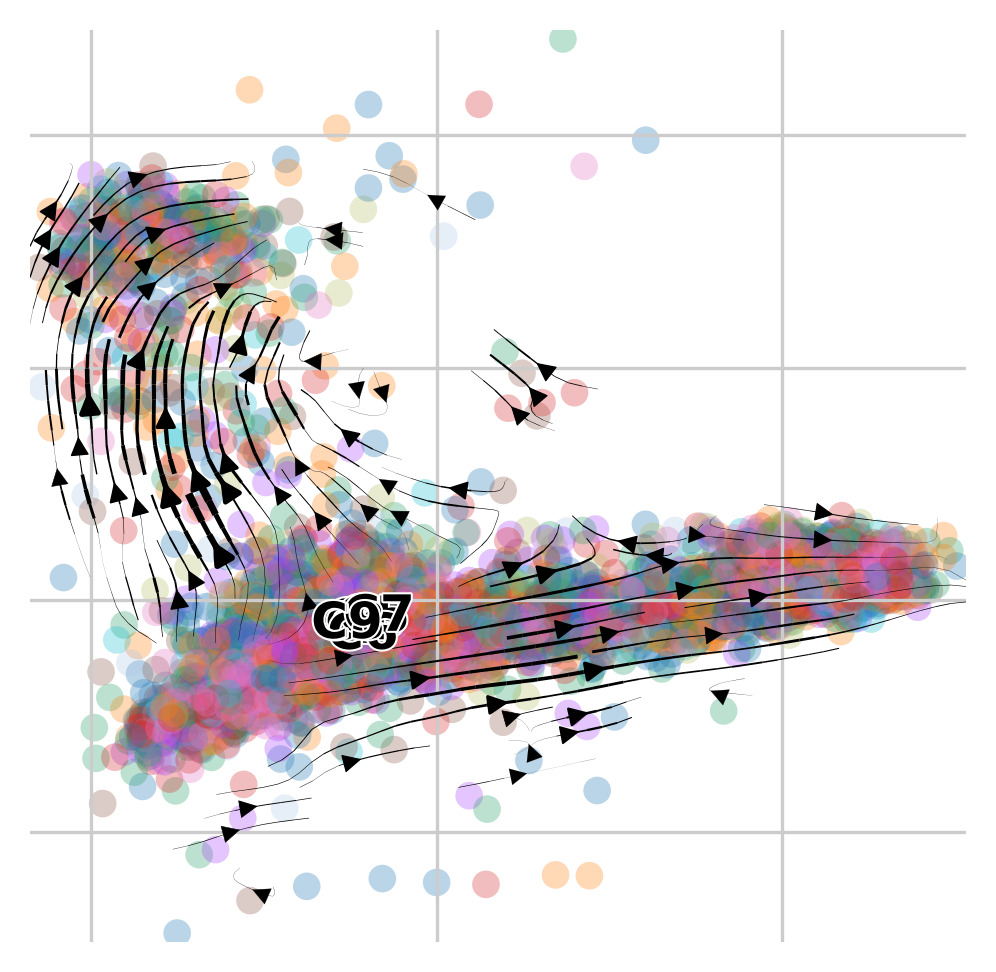

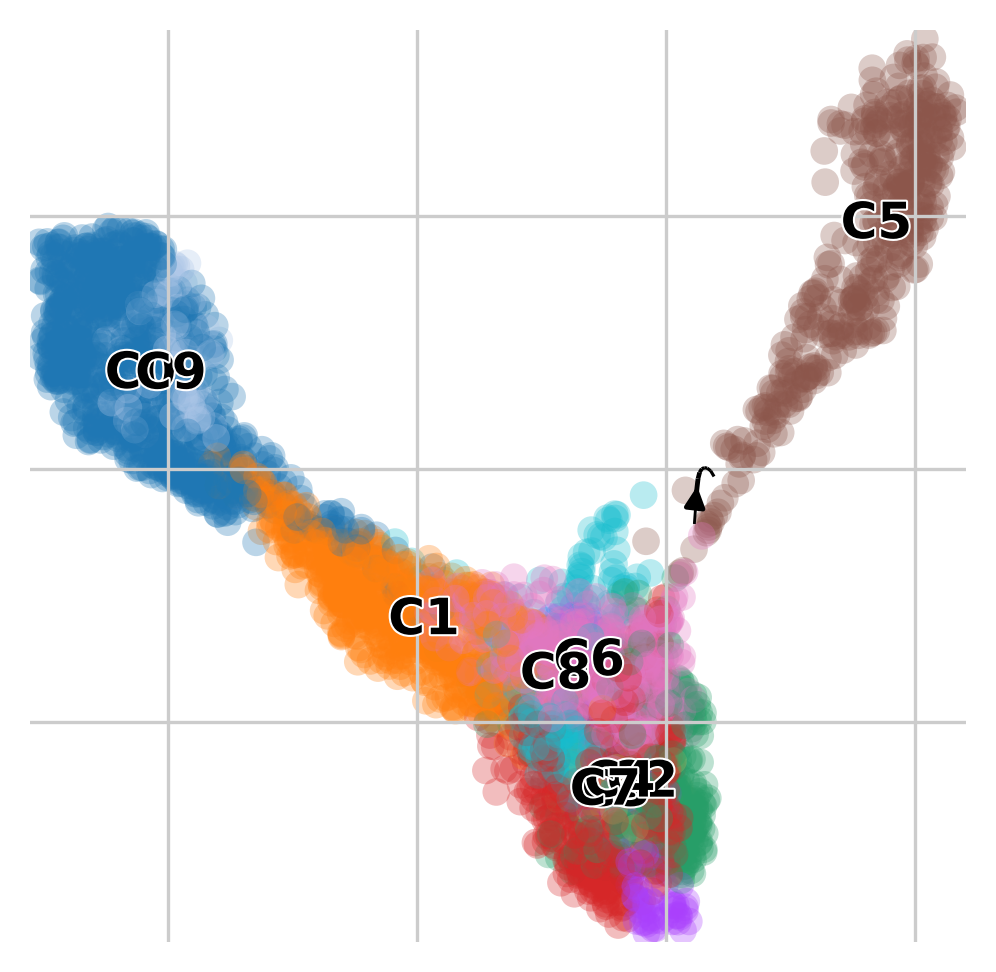

In [34]:
scv.pl.velocity_embedding(adata, basis='pca', arrow_size=5, dpi=120, alpha=1)
scv.pl.velocity_embedding_grid(adata, basis='umap', arrow_size=2, dpi=120, alpha=1)
scv.pl.velocity_embedding_stream(adata, basis='pca', legend_fontsize=12, title="", smooth=0.8, min_mass=4)
scv.pl.velocity_embedding_stream(adata, basis='umap', color=['clusters'], legend_fontsize=12, title="", smooth=0.8, min_mass=4)

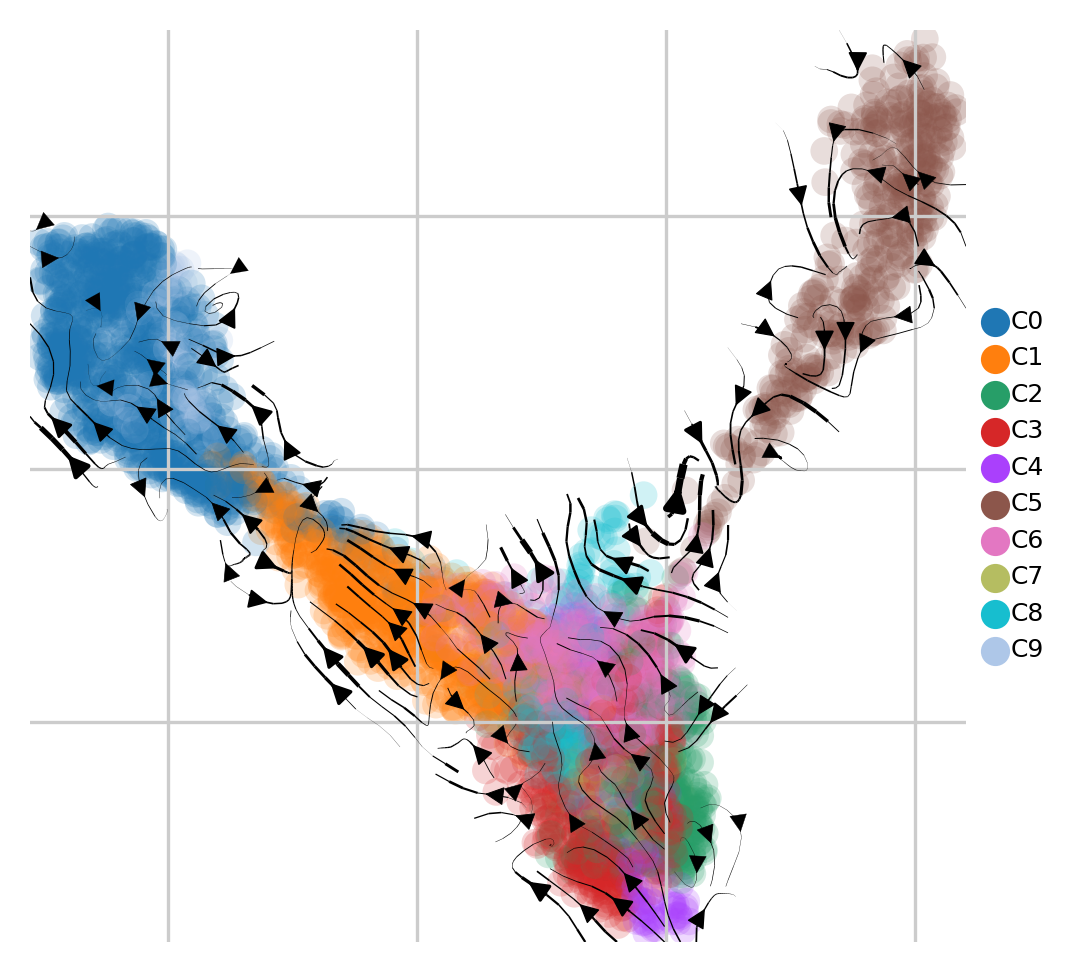

In [36]:
scv.pl.velocity_embedding_stream(adata, basis='umap', color=['clusters'], legend_fontsize=6, title="", smooth=0.8, min_mass=1,
                                density=2, alpha=0.2, sort_order=True, legend_loc='right') #save ='Velocity_pca_cell_class.png'

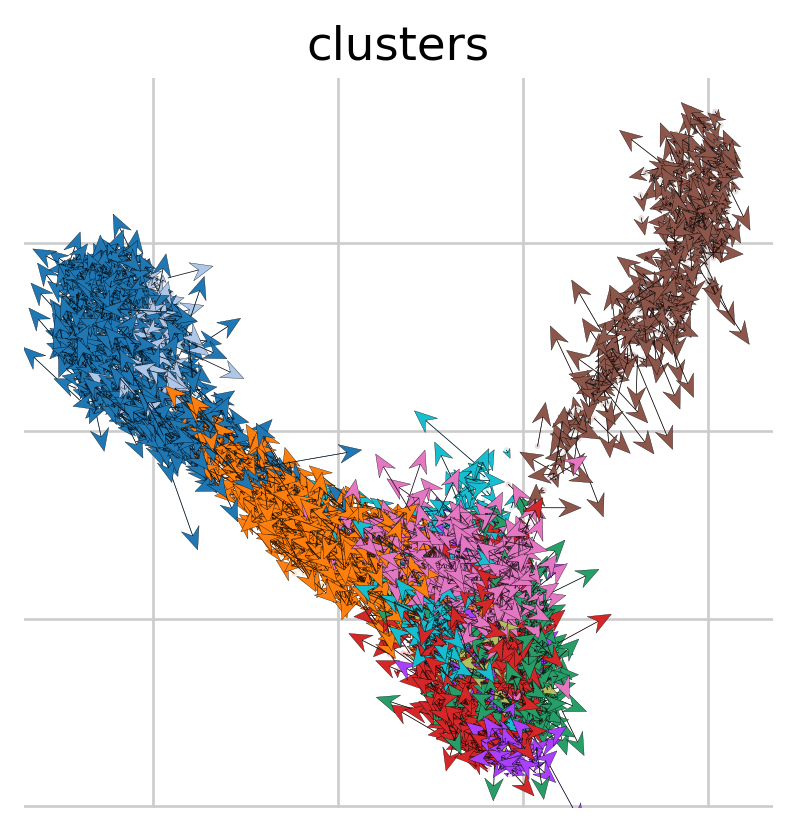

In [37]:
scv.pl.velocity_embedding(adata, basis='umap', arrow_length=10, arrow_size=5, smooth=0.8, dpi=120)

In [41]:
adata.write_h5ad(
    '/proj/snic2020-16-146/10xgams/seurat_analysis/results/single_cell/integrated_dataset_SS2_10X_velo_processed.h5ad')

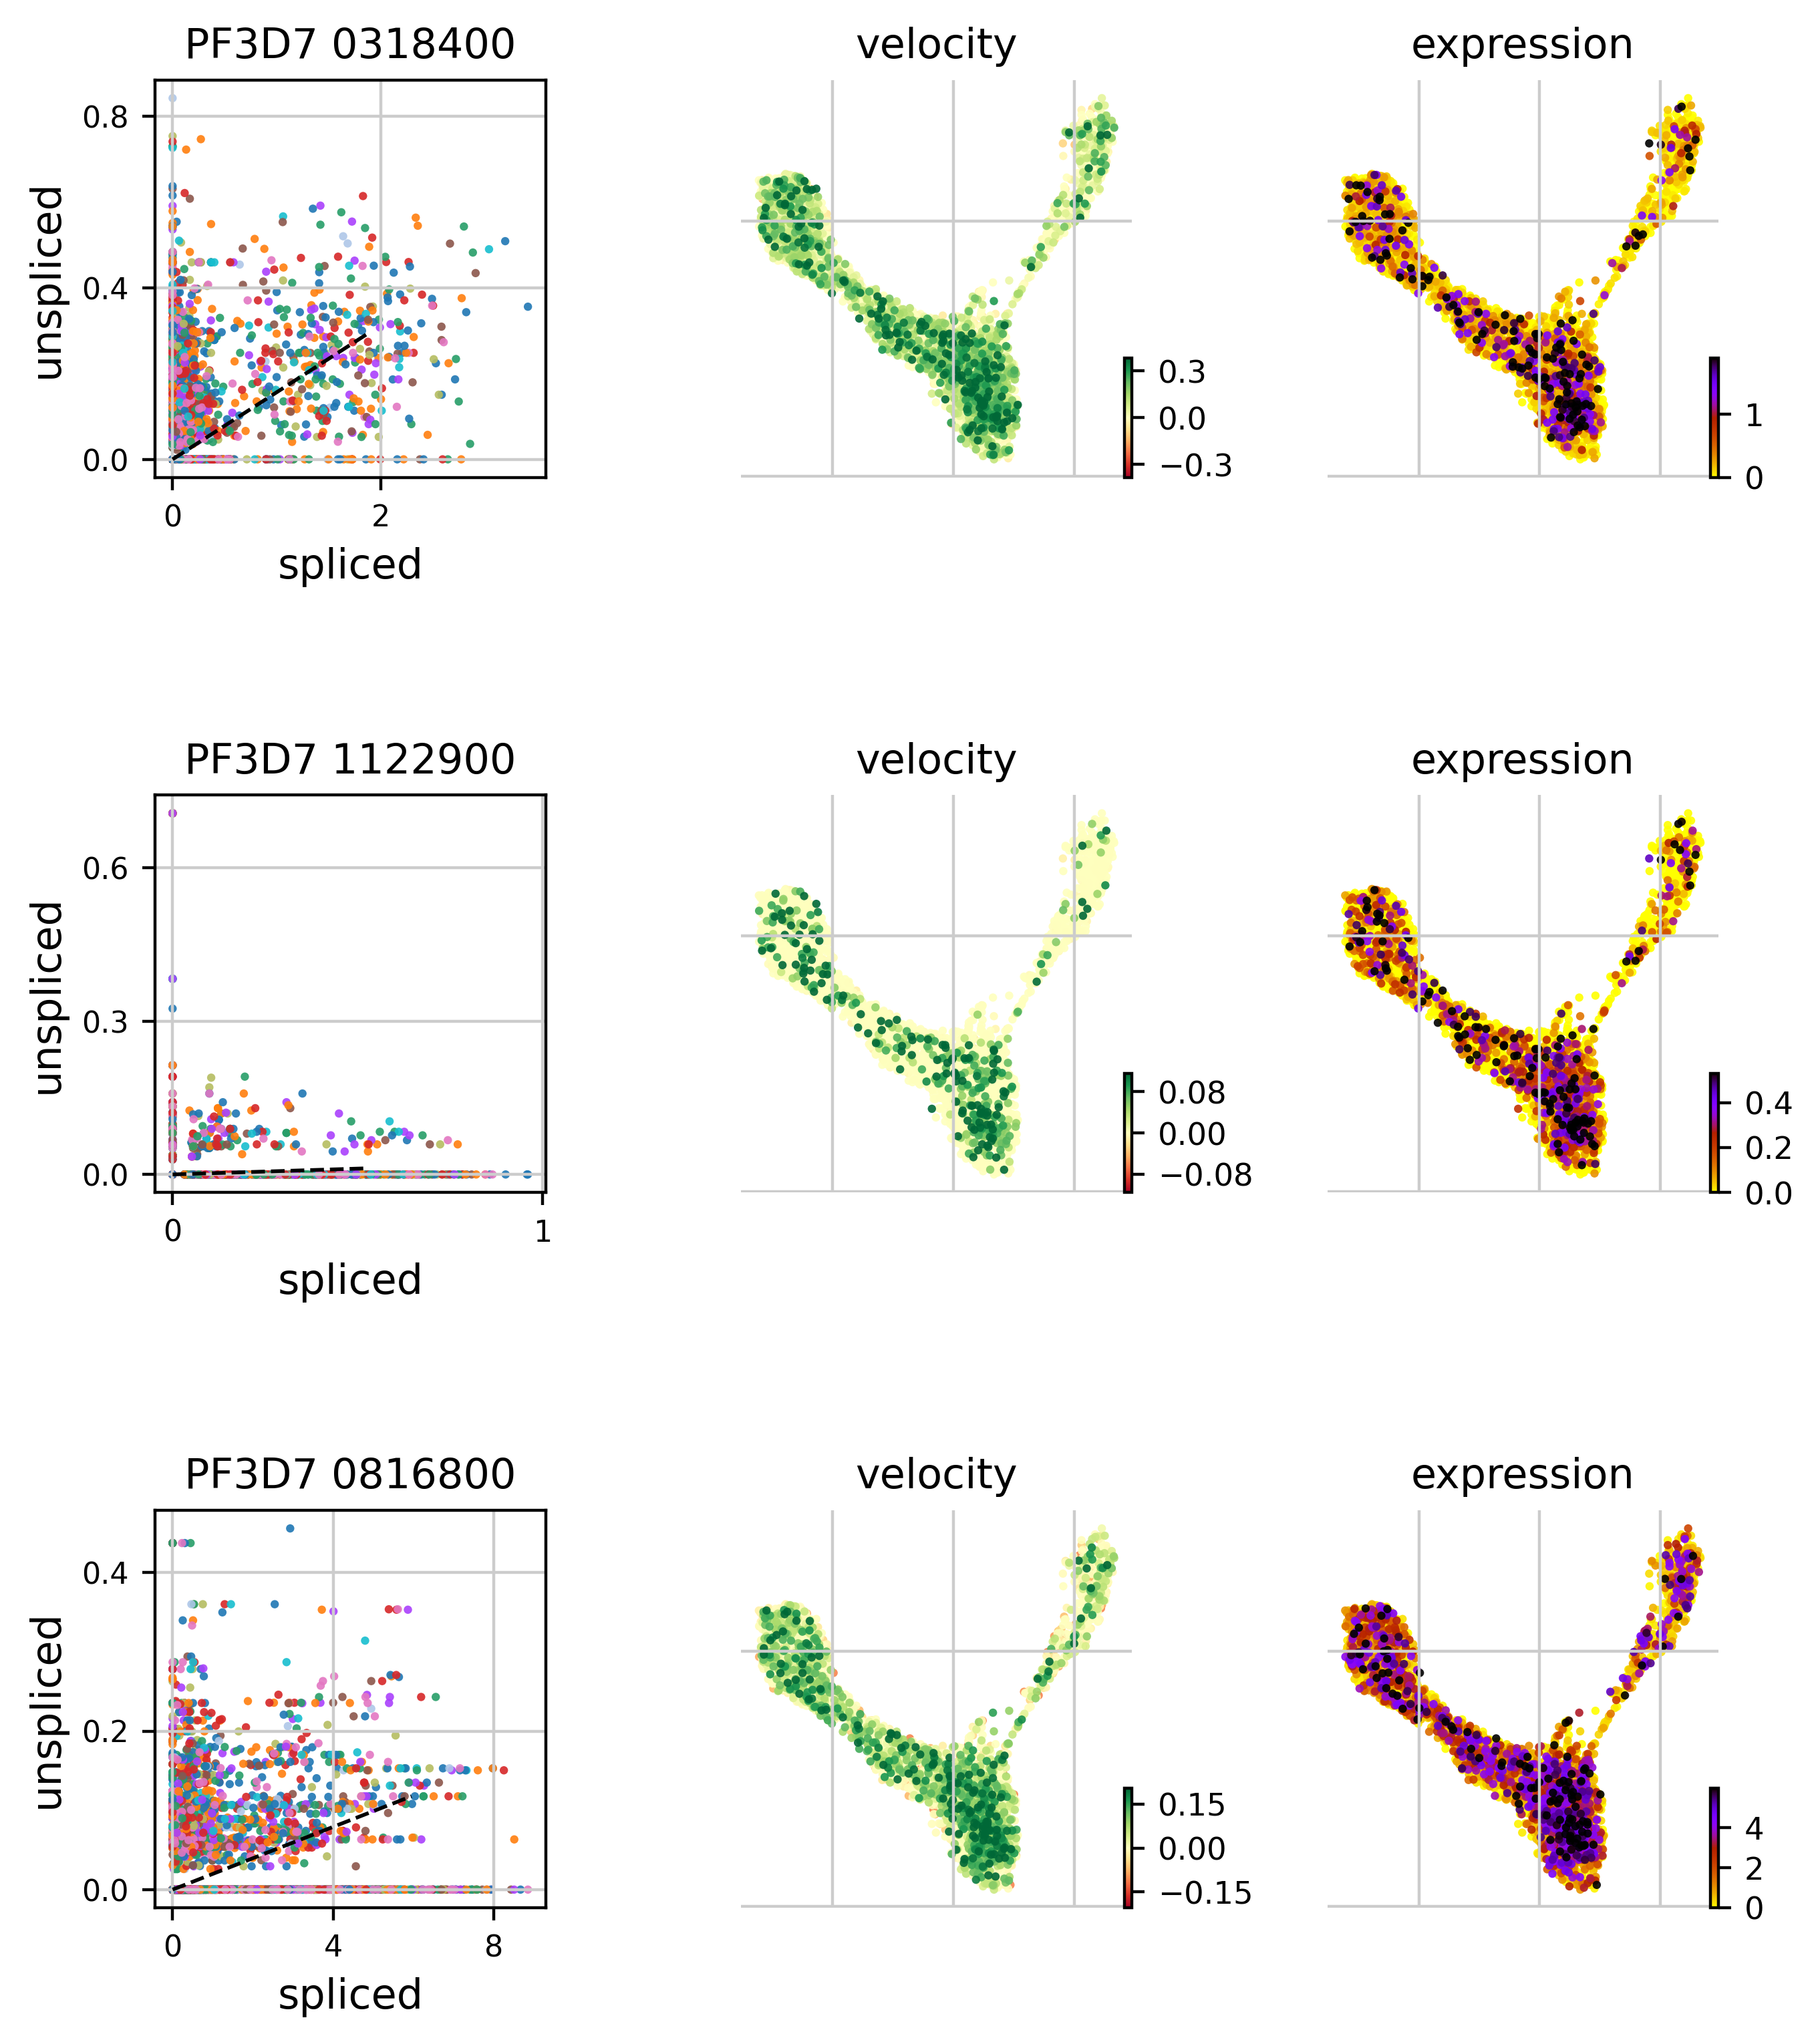

In [39]:
#examine some marker gens 
#sign_markers= [x.strip() for x in open('sign_markers.txt')]
sign_genes = ['PF3D7_0318400', 'PF3D7_1122900', 'PF3D7_0816800', 'PF3D7_1325200']
#scv.pl.velocity(adata, sign_genes, ncols=1, add_outline=True, dpi=200, use_raw=False)
scv.pl.velocity(adata, sign_genes[:3],colorbar=True, figsize=(5,6), dpi=200, 
               alpha=0.9, size =20) #save='./figures/Velo_sign_genes.png'

In [40]:
adata

AnnData object with n_obs × n_vars = 4991 × 4912
    obs: 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'pct_counts_hb', 'n_counts', 'S_score', 'G2M_score', 'phase', 'louvain_0.4', 'leiden_0.4', 'louvain_0.6', 'leiden_0.6', 'louvain_0.8', 'leiden_0.8', 'louvain_0.9', 'leiden_0.9', 'louvain_1.0', 'leiden_1.0', 'louvain_1.1', 'leiden_1.1', 'louvain_1.2', 'leiden_1.2', 'louvain_1.4', 'leiden_1.4', 'louvain_1.6', 'leiden_1.6', 'day', 'batch', 'sample', 'clusters', 'velocity_self_transition'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection', 'gene_count_corr', 'velocity_gamma', 'velocity_qreg_ratio', 'velocity_r2', 'velocity_genes'
    uns: 'batch_colors', 'clusters_colors', 'day_colors', 'dendrogra